# **HEALTH CARE EXPLORATORY DATA ANALYSIS(EDA)**

Healthcare is a critical domain where data plays pivotal role in understanding patient demographics,medical conditions, and the effectiveness of healthcare services. In this EDA project, we will delve into a synthetic healthcare dataset that mimics real-world data.
This dataset encompasses various aspects of patient information, admission details, medical conditions, and healthcare services, making it a comprehensive dataset for analysis. The primary goal of this project is to explore, clean, and visualize the data to gain insights into healthcare trends and understand the distribution of medical conditions.

K: I will note any changes or additions to the dataset by me with a K. 
I have chosen this dataset due to its huge scale and the fact that its columns are prevalent in many healthcare datasets. The data in this dataset is synthetic and therefore the insights it gives are not always correct or very interesting. However, I believe this code is still very relevant for project 0 as the techniques used are suitable for many healthcare datasets and this code demonstrates useful tools. In project 1, there are many places we can find real healthcare data that hasn't been analysed and apply the techniques learnt here.

Note: I have also used a larger dataset than the creator of this code so some analysis is different.

**IMPORT NECESSARY LIBRARIES**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

**LOADING THE DATASET**

In [2]:
#read_csv functions helps to load the csv file data and create a dataframe in pandas
healthcare = pd.read_csv("/Users/Kyra/Downloads/healthcare_dataset.csv")
#the below code displays the dataframe transpose for the 1st five rows
healthcare.head().T

,0,1,2,3,4
Name,Bobby JacksOn,LesLie TErRy,DaNnY sMitH,andrEw waTtS,adrIENNE bEll
Age,30,62,76,28,43
Gender,Male,Male,Female,Female,Female
Blood Type,B-,A+,A-,O+,AB+
Medical Condition,Cancer,Obesity,Obesity,Diabetes,Cancer
Date of Admission,2024-01-31,2019-08-20,2022-09-22,2020-11-18,2022-09-19
Doctor,Matthew Smith,Samantha Davies,Tiffany Mitchell,Kevin Wells,Kathleen Hanna
Hospital,Sons and Miller,Kim Inc,Cook PLC,"Hernandez Rogers and Vang,",White-White
Insurance Provider,Blue Cross,Medicare,Aetna,Medicare,Aetna
Billing Amount,18856.281306,33643.327287,27955.096079,37909.78241,14238.317814


**DATASET BRIEF OVERVIEW**

In [3]:
#summary of the DataFrame, including the index dtype and column dtypes, non-null values and memory usage
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
#computes summary of statistics pertaining to the DataFrame's numeric columns.
healthcare.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


K: Some data cleaning:
I've noticed here that there's at least one data point with a negative billing amount, so will ammend this and remove these points to make the model as real as possible.

In [5]:
healthcare = healthcare[healthcare['Billing Amount'] >= 0]

In [6]:
# now with negative payments removed
healthcare.describe()

,Age,Billing Amount,Room Number
count,55392.000000,55392.000000,55392.000000
mean,51.538543,25590.084632,301.119205
std,19.602045,14178.657522,115.238552
min,13.000000,9.238787,101.000000
25%,35.000000,13297.478682,202.000000
50%,52.000000,25573.823359,302.000000
75%,68.000000,37849.210062,401.000000
max,89.000000,52764.276736,500.000000


We can understand from the above table that age range of patients is between 13 to 89. 

In [7]:
#computes summary of statistics pertaining to the DataFrame's categorical columns.
healthcare.describe(include = 'O')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55392,55392,55392,55392,55392,55392,55392,55392,55392,55392,55392,55392
unique,49896,2,8,6,1827,40276,39815,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27726,6953,9297,50,27,44,11225,18618,53,11119,18589


In [8]:
# return a tuple with the dimension of the dataframe
healthcare.shape

(55392, 15)

There are 10000 rows and 15 columns in this dataset.
K: In the expanded dataset there are 55,392 realisations (rows).

**DATA CLEANING**

In [9]:
#check for NULL values if any in each column
healthcare.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

There are no null values in our healthcare dataset as the value for all the columns are zero.

In [10]:
#check if there are duplicate records in the data
healthcare.duplicated().sum()

532

K: new dataset came with some duplicates - remove them.

In [11]:
healthcare = healthcare.drop_duplicates()
healthcare.duplicated().sum()

0

As the result is zero it means there are no duplicate records

In [12]:
healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [13]:
# Date of Admission and Discharge Date have dtype as object let's format it to datetime
for date in ['Date of Admission','Discharge Date']:
    healthcare[date] = pd.to_datetime(healthcare[date])
#calculate the no: of days patients got admitted in hospital
healthcare['Days Hospitalized'] = (healthcare['Discharge Date'] - healthcare['Date of Admission']).dt.days
healthcare['Days Hospitalized'] = healthcare['Days Hospitalized'].astype(int)
healthcare['Days Hospitalized']

0         2
1         6
2        15
3        30
4        20
         ..
55495    30
55496     9
55497    28
55498     6
55499    27
Name: Days Hospitalized, Length: 54860, dtype: int64

In [14]:
#drop columns irrelevant to our analysis
healthcare = healthcare.drop(columns = ['Name','Date of Admission','Discharge Date','Room Number'])
healthcare.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Days Hospitalized'],
      dtype='object')

K: For my own data analysis, I am going to explore the relationship between medical condition, days hospitalised, admission type and billing amount, as they should have a large correlation. I will create my own version of the data healthcare_reduced and show a few realisations. 

In [15]:
healthcare_reduced = healthcare.drop(columns = ['Age', 'Gender', 'Blood Type', 'Doctor',
       'Hospital', 'Insurance Provider',
       'Medication', 'Test Results'])
healthcare_reduced.head(10)

,Medical Condition,Billing Amount,Admission Type,Days Hospitalized
0,Cancer,18856.281306,Urgent,2
1,Obesity,33643.327287,Emergency,6
2,Obesity,27955.096079,Emergency,15
3,Diabetes,37909.782410,Elective,30
4,Cancer,14238.317814,Urgent,20
5,Asthma,48145.110951,Urgent,4
6,Diabetes,19580.872345,Emergency,12
7,Cancer,45820.462722,Emergency,10
8,Asthma,50119.222792,Elective,13
9,Cancer,19784.631062,Elective,30


**DATA EXPLORATION AND VISUALIZATION**

In [16]:
#using for loop to find the distribution of data for categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print(healthcare[col].value_counts())
        print('--')

Gender
Male      27449
Female    27411
Name: count, dtype: int64
--
Blood Type
A-     6882
A+     6879
B+     6876
AB+    6872
B-     6861
AB-    6859
O+     6843
O-     6788
Name: count, dtype: int64
--
Medical Condition
Arthritis       9207
Diabetes        9197
Hypertension    9131
Obesity         9127
Cancer          9121
Asthma          9077
Name: count, dtype: int64
--
Insurance Provider
Cigna               11115
Medicare            11018
UnitedHealthcare    10995
Blue Cross          10937
Aetna               10795
Name: count, dtype: int64
--
Admission Type
Elective     18437
Urgent       18353
Emergency    18070
Name: count, dtype: int64
--
Medication
Lipitor        11018
Ibuprofen      11002
Aspirin        10963
Paracetamol    10945
Penicillin     10932
Name: count, dtype: int64
--
Test Results
Abnormal        18399
Normal          18302
Inconclusive    18159
Name: count, dtype: int64
--


____________________________________________________________________________________________________


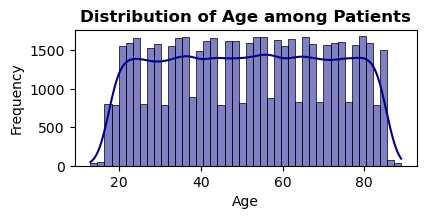

____________________________________________________________________________________________________


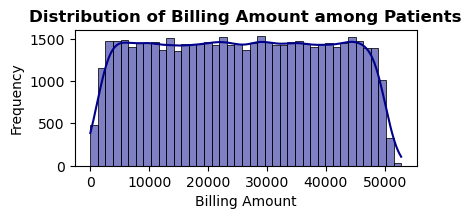

____________________________________________________________________________________________________


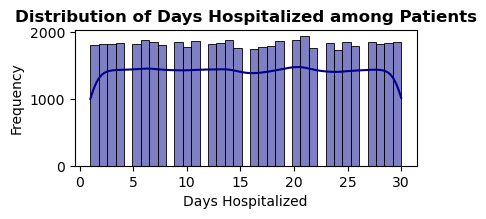

In [17]:
#plotting histograms to find the frequency of numeric columns (age, billing amount and days hospitalized)
for col in healthcare.columns:
    if healthcare[col].dtype == 'int' or healthcare[col].dtype == 'float':
        plt.figure(figsize = (15,6))
        plt.style.use('seaborn-v0_8-dark-palette')
        plt.subplot(3,3,3)
        sns.histplot(healthcare[col],kde = True,color = 'darkblue')
        plt.ylabel('Frequency',fontsize = 10)
        plt.xlabel(col,fontsize = 10)
        plt.title(f'Distribution of {col} among Patients',fontsize = 12,weight = 'bold')
        print("_"*100)
        plt.show()

K: This is an example of the synthetic data giving strange results. Data such as patient age are expected to be (and are all in the example with the original data) roughly uniformally distributed. The same goes for days hospitalised, where we wouldn't expect values {4, 8, 12, 16, 19, 23, 27} to have 0 values. 

I will discuss the downsides of synthetic data as seen here in my review, but also still find the skills leant here relevant.

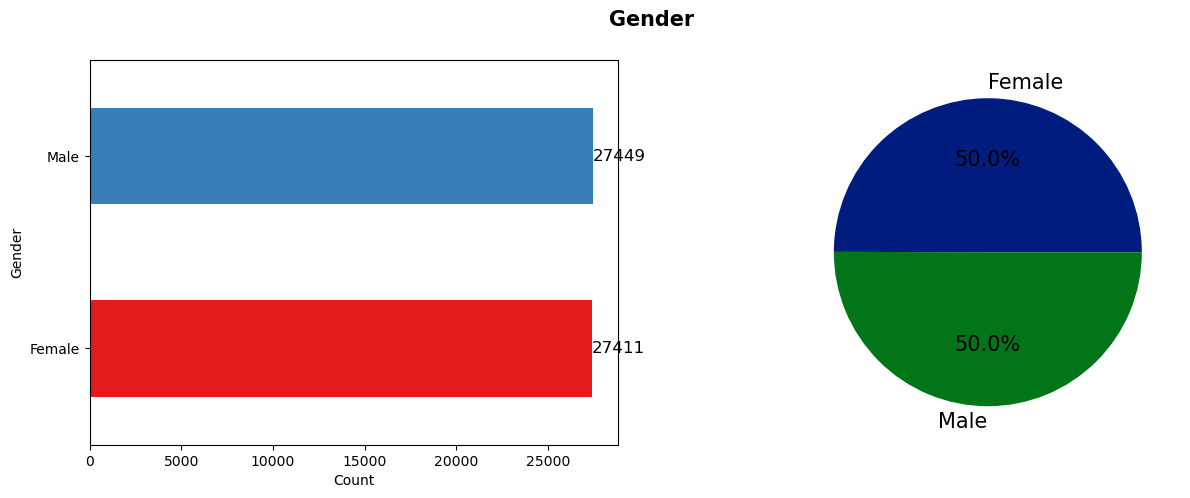

____________________________________________________________________________________________________




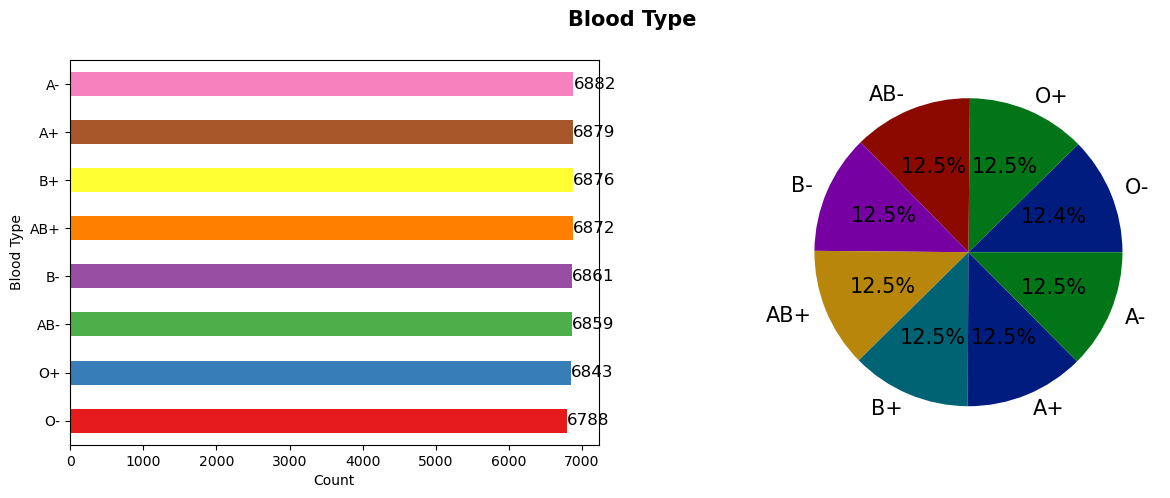

____________________________________________________________________________________________________




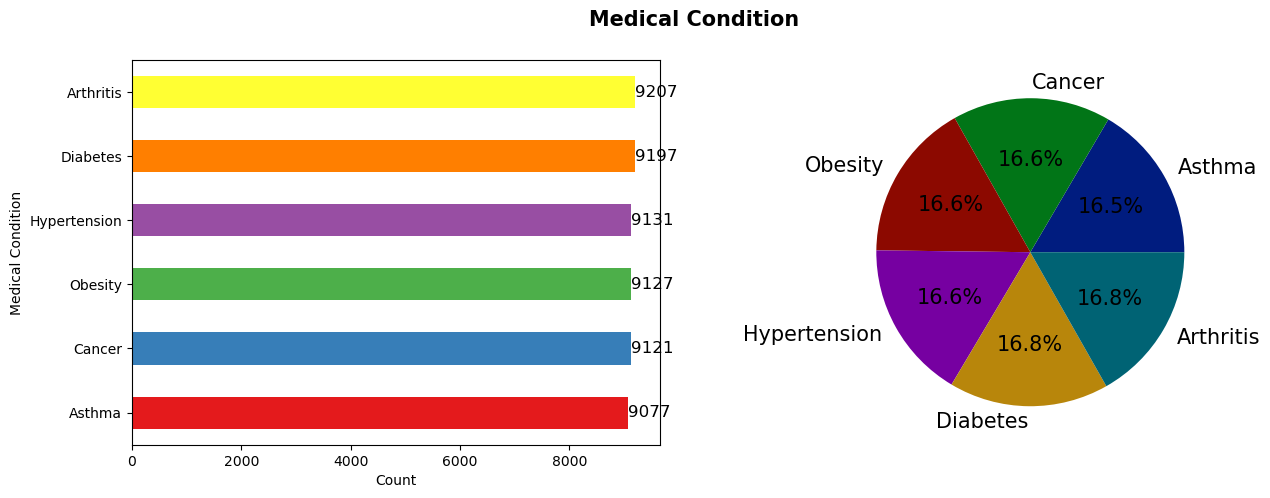

____________________________________________________________________________________________________




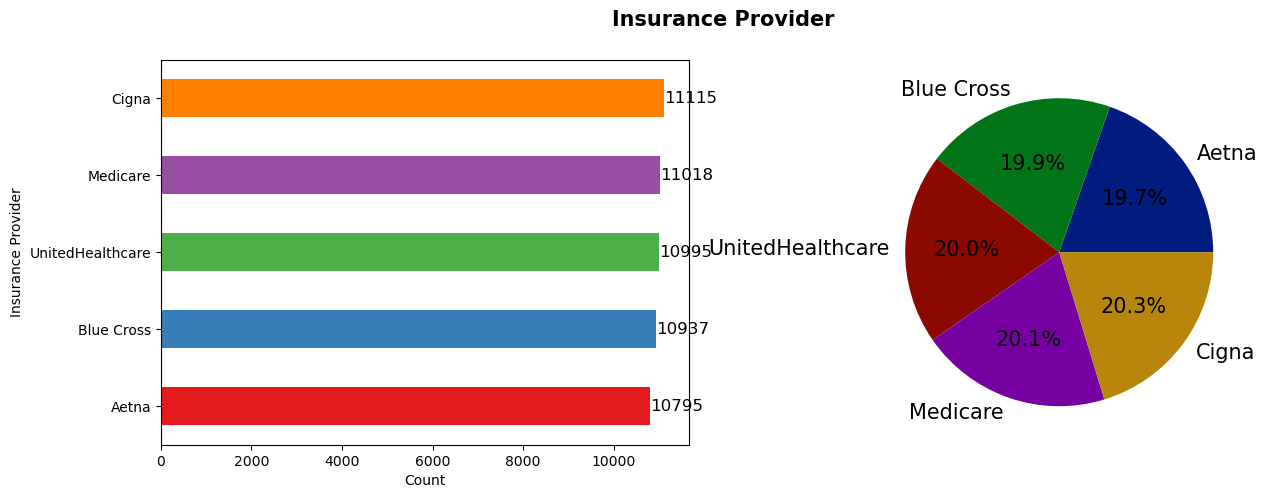

____________________________________________________________________________________________________




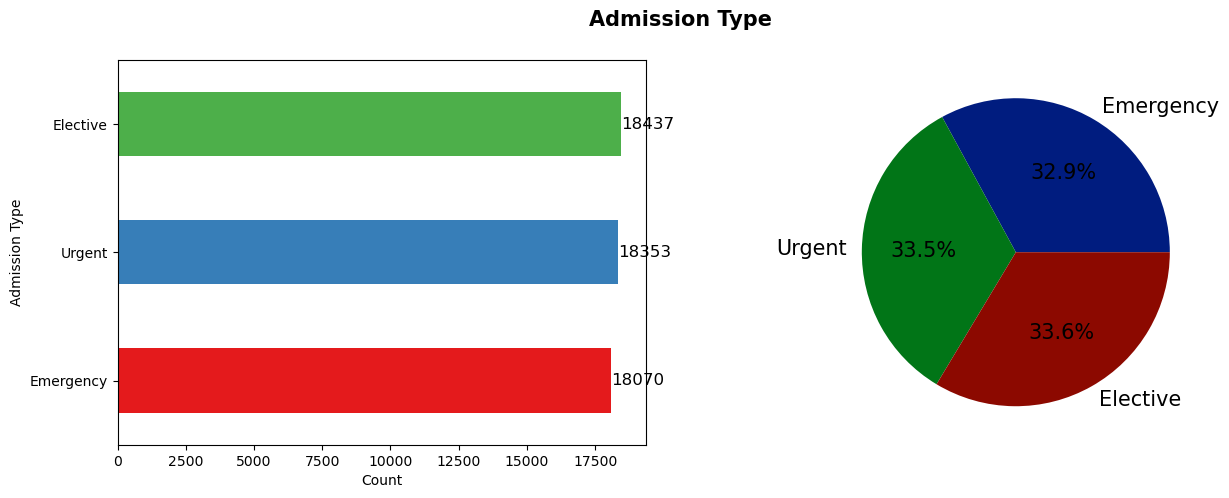

____________________________________________________________________________________________________




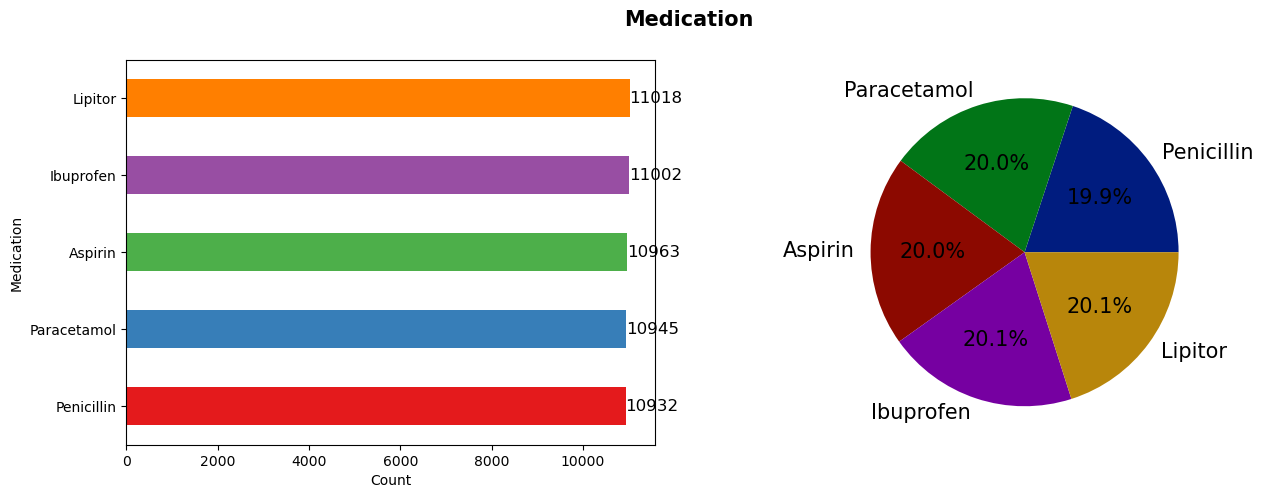

____________________________________________________________________________________________________




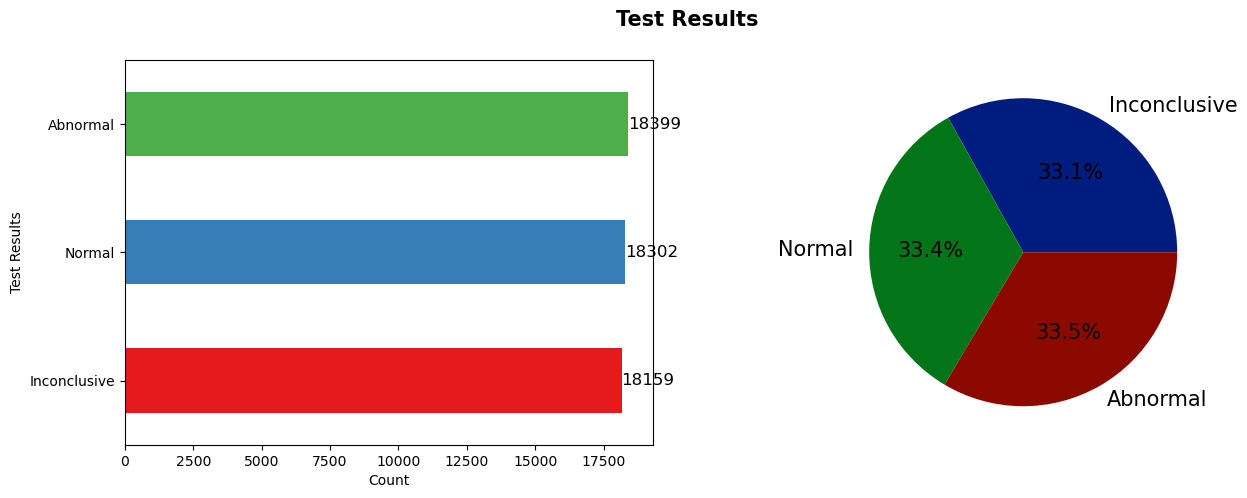

____________________________________________________________________________________________________


In [18]:
#plotting pie chart and bar chart to find the data distribution for categorical columns
#using for loop for visualization of data in categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print('\n')
        fig,ax = plt.subplots(1,2,figsize = (15,5))
        fig.suptitle(col,fontsize = 15,weight = 'bold')
        plt.subplot(1,2,1)
        category_count = healthcare[col].value_counts().sort_values()
        category_count.plot(kind = 'barh',color= plt.cm.Set1.colors)
        for index,value in enumerate(category_count):
            plt.text(value,index,str(value),fontsize = 12,va = 'center')
        plt.xlabel('Count')
        plt.subplot(1,2,2)
        category_count.plot(kind = 'pie',
               labels = category_count.index,
               autopct = '%1.1f%%',
               textprops = {'fontsize':15})
        plt.ylabel('')
        plt.show()
        print("_"*100)

**What is the distribution of medical conditions between genders?**

In [19]:
#unstack function converts the data into 2 dimensional
gender_medical = healthcare.groupby(['Medical Condition','Gender']).size().sort_values().unstack()
gender_medical

Gender,Female,Male
Medical Condition,,
Arthritis,4636,4571
Asthma,4498,4579
Cancer,4556,4565
Diabetes,4599,4598
Hypertension,4559,4572
Obesity,4563,4564


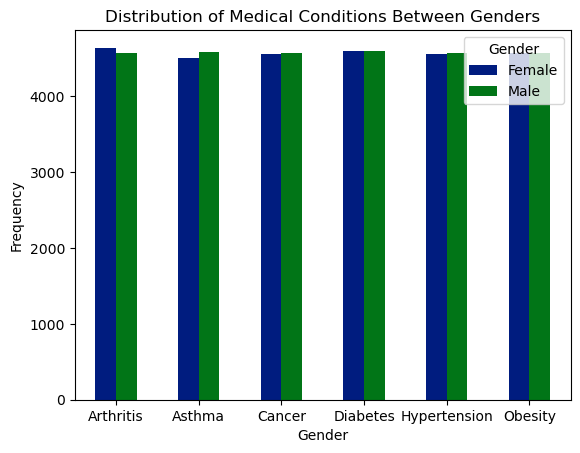

In [20]:
gender_medical.plot(kind = 'bar')
plt.title('Distribution of Medical Conditions Between Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

***Interpretation***

K: There is a fairly even split between the genders on all conditions. Arthritis is leading medical condition among female whereas Diabetes is leading cause among male.

**What is the correlation between age,billing amount and days hospitalized**

In [21]:
# selecting the columns to correlate
correlation_columns = ['Age','Billing Amount','Days Hospitalized']
# creating a df using the above columns
correlate_df = healthcare[correlation_columns]
#encoding categorical columns for correlation
correlate_df['Gender'] = healthcare['Gender'].astype('category').cat.codes
correlate_df['Admission Type'] = healthcare['Admission Type'].astype('category').cat.codes
correlate_df['Test Results'] = healthcare['Test Results'].astype('category').cat.codes
# creating correlation matrix
correlation_matrix = correlate_df.corr()
correlation_matrix

,Age,Billing Amount,Days Hospitalized,Gender,Admission Type,Test Results
Age,1.000000,-0.003309,0.008022,-0.002707,0.003825,-0.006613
Billing Amount,-0.003309,1.000000,-0.004801,0.004561,-0.002744,-0.003003
Days Hospitalized,0.008022,-0.004801,1.000000,0.004007,-0.004914,0.001200
Gender,-0.002707,0.004561,0.004007,1.000000,0.009884,0.005105
Admission Type,0.003825,-0.002744,-0.004914,0.009884,1.000000,-0.000548
Test Results,-0.006613,-0.003003,0.001200,0.005105,-0.000548,1.000000


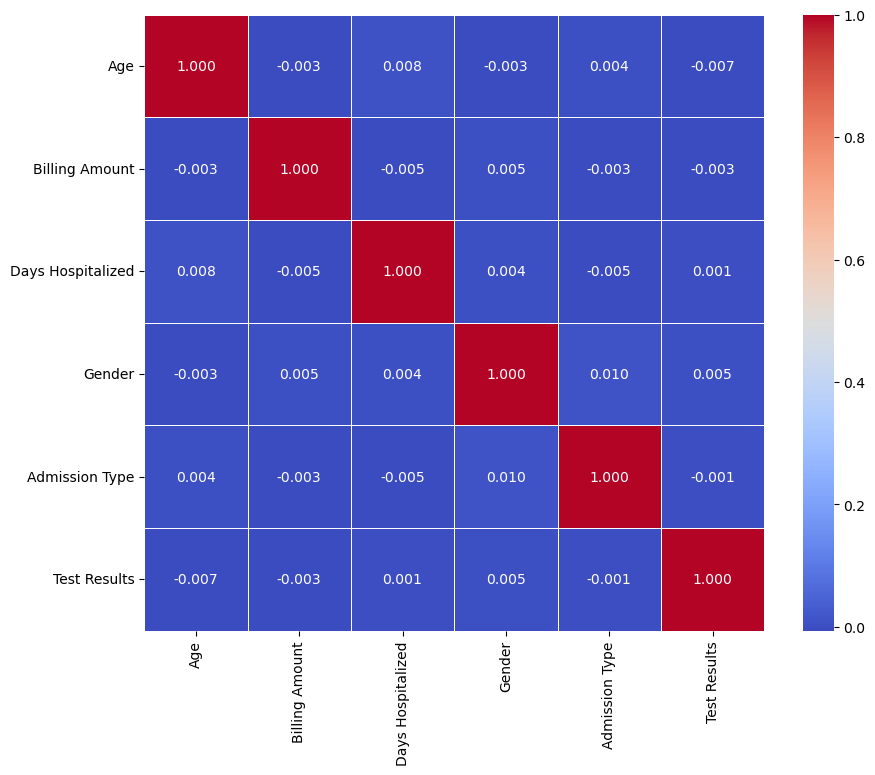

In [22]:
#plotting correlation matrix using heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.3f',linewidths = 0.5)
plt.show()

***Interpretation***

(Edited to fit new data output)

* There is a slight positive correlation between age and billing amount. Additionally, there is a slight negative correlation between billing amount and days hospitalized, which is unexpected. 
* The largest magnitude correlation is between gender and admission type. 
* All of these correlations are very close to 0, indictating essentially no relationship between any of the variables. In practise with this many data points, this can only be put down to the data being unreliable and incorrect as we know these should be correlated.
* Again the reliability or usefulness of synthetic data can be questioned.

**What is the total billing amount for top 10 hospitals?**

In [23]:
# Grouping data by hospital and calculating the average billing amount
top10_hospital_billing = healthcare.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
top10_hospital_billing

,Hospital,Billing Amount
0,Johnson PLC,1.081477e+06
1,LLC Smith,1.030190e+06
2,Smith PLC,1.029424e+06
3,Ltd Smith,1.003366e+06
4,Smith Ltd,9.700359e+05
5,Johnson Inc,9.369313e+05
6,Group Smith,9.029758e+05
7,Inc Brown,8.779613e+05
8,LLC Johnson,8.164384e+05
9,Smith Group,8.067679e+05


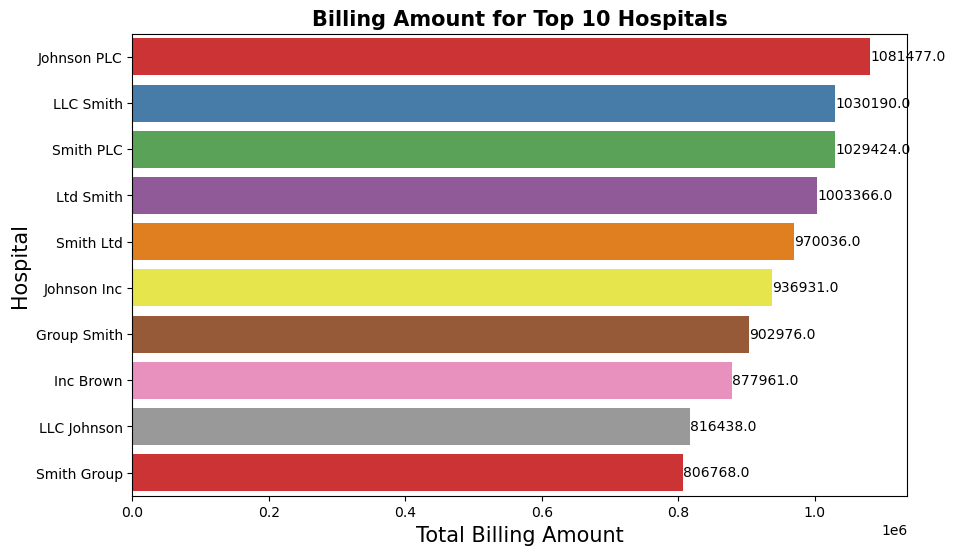

In [24]:
# plot bar graph to find the top 10 hospitals by billing
plt.figure(figsize=(10,6))
sns.barplot(x= top10_hospital_billing['Billing Amount'],
            y= top10_hospital_billing['Hospital'],
            palette="Set1")
for index,value in enumerate(top10_hospital_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Hospital',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 10 Hospitals',fontsize = 15, weight = 'bold')
plt.show()

***INTERPRETATION***

Johnson PLC has the highest average billing amount of 1,084,203.

**Who are the top 20 doctors by billing amount?**

In [25]:
# Grouping data by doctors and calculating the sum of billing amount
top20_doctors_billing = healthcare.groupby(['Doctor'])['Billing Amount'].sum().sort_values(ascending = False)[:20].reset_index()
top20_doctors_billing

,Doctor,Billing Amount
0,Michael Smith,784501.843132
1,John Smith,610109.604175
2,Robert Smith,609160.688766
3,Robert Johnson,524193.003178
4,David Smith,473345.609187
5,William Johnson,469198.116030
6,John Johnson,466769.966463
7,James Smith,461953.619390
8,Michael Johnson,460819.038528
9,David Johnson,445605.542275


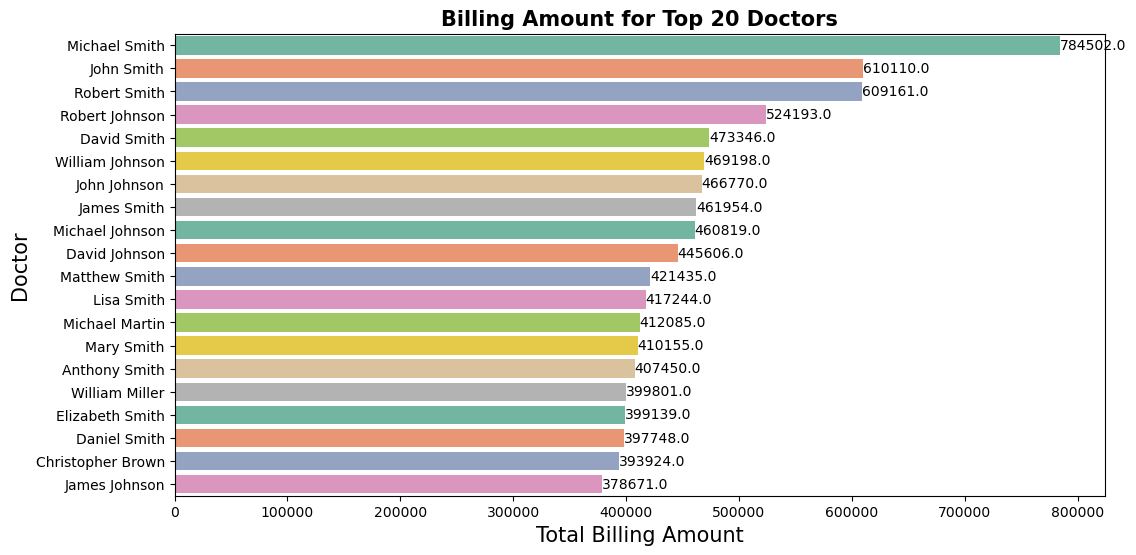

In [26]:
# plot bar graph to find the top 20 doctors by billing
plt.figure(figsize=(12,6))
sns.barplot(x= top20_doctors_billing['Billing Amount'],
            y= top20_doctors_billing['Doctor'],
            palette="Set2")
for index,value in enumerate(top20_doctors_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Doctor',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 20 Doctors',fontsize = 15, weight = 'bold')
plt.show()

***Interpretation***


Doctor Michael Smith is the top doctor with a total billing amount of 784,502.

**Which medical condition generated the highest average billing among male and female?**

In [27]:
# Grouping data by medical condition and gender then calculating the mean of billing amount
medical_gender_billing = healthcare.groupby(['Medical Condition','Gender'])[['Billing Amount']].mean().reset_index()
medical_gender_billing

,Medical Condition,Gender,Billing Amount
0,Arthritis,Female,25370.473289
1,Arthritis,Male,25717.775322
2,Asthma,Female,25433.631050
3,Asthma,Male,25932.685600
4,Cancer,Female,25341.213277
5,Cancer,Male,25070.901863
6,Diabetes,Female,25614.334869
7,Diabetes,Male,25814.339576
8,Hypertension,Female,25491.348152
9,Hypertension,Male,25628.146821


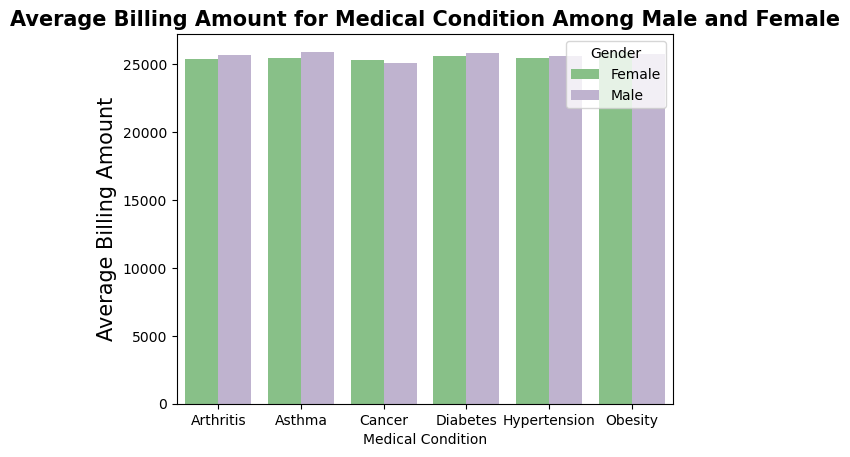

In [28]:
# plot bar graph to find the average billing amount for medical condition among male and female
sns.barplot(x= medical_gender_billing['Medical Condition'],
            y= medical_gender_billing['Billing Amount'],
            hue = medical_gender_billing['Gender'],ci = None,
            palette="Accent")
# Adding labels and title
plt.ylabel('Average Billing Amount',fontsize = 15)
plt.title('Average Billing Amount for Medical Condition Among Male and Female',fontsize = 15, weight = 'bold')
plt.show()

**What is the distribution of different age groups?**

In [29]:
min_age = healthcare['Age'].min()
max_age = healthcare['Age'].max()
print(min_age,",",max_age)

13 , 89


In [30]:
healthcare['Age_Group'] = pd.cut(healthcare['Age'],bins = [13,18,30,40,50,60,70,80,float('inf')],
                                labels = ['13-17','18-30','31-40','41-50','51-60','61-70','71-80','Over 80'],
                                right = False)
Age_group = healthcare['Age_Group'].value_counts().sort_index()
Age_group

Age_Group
13-17       116
18-30      9473
31-40      8088
41-50      8028
51-60      8247
61-70      8085
71-80      7985
Over 80    4838
Name: count, dtype: int64

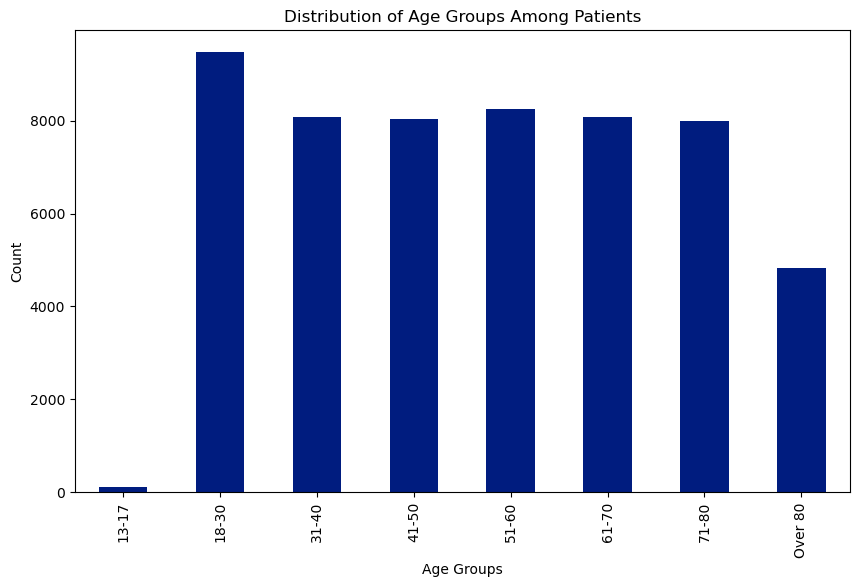

In [31]:
plt.figure(figsize=(10,6))
Age_group.plot(kind = 'bar')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

***Interpretation***

The maximum number of patients are in the range of 18-30.

**CONCLUSION**

- Compared to male, there are high female patients.
- Most patients have the blood type of **AB-**.
- Asthma is the major medical condition among patients.
- Cigna is the leading insurance provider.
- Pencilin is the most prescribed medication.

Back to my data analysis.
I'm going to use some plots I didn't use in the COVID data set: boxplots, bar graphs, bubble charts.

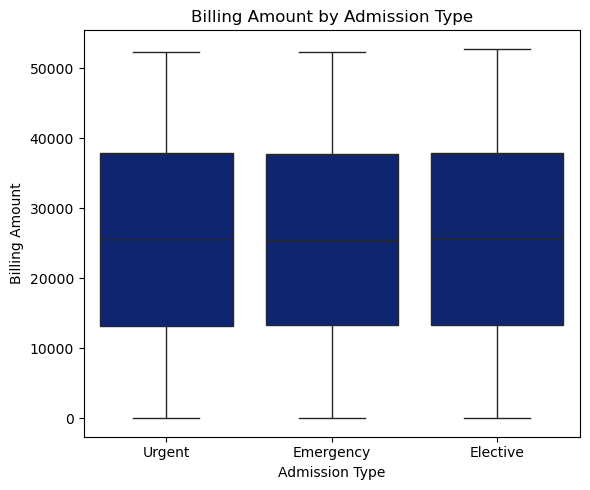

In [32]:
plt.figure(figsize=(6,5))
sns.boxplot(
    data=healthcare_reduced,
    x='Admission Type',
    y='Billing Amount'
)
plt.title('Billing Amount by Admission Type')
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.tight_layout()
plt.show()

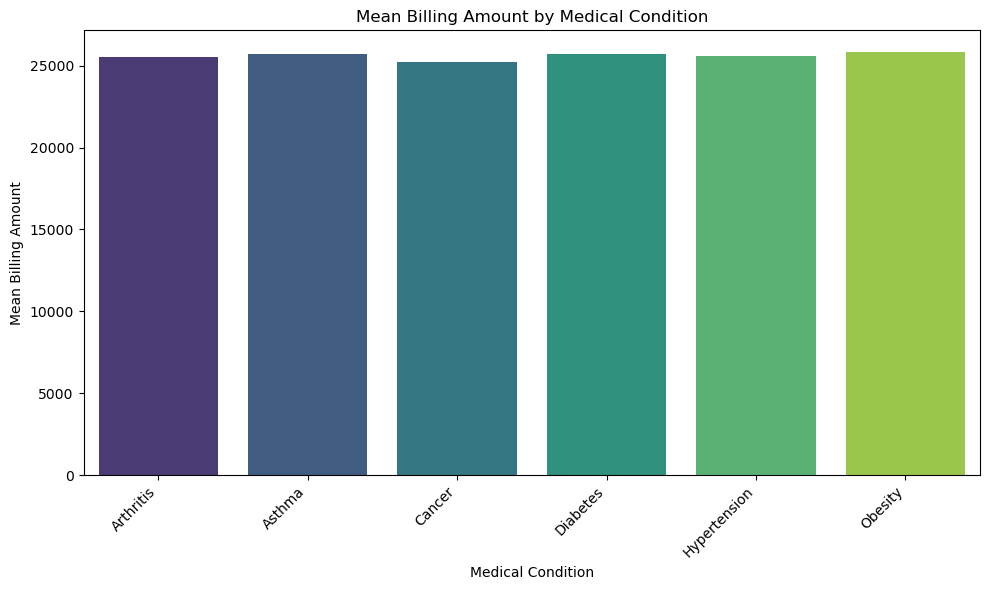

In [33]:
mean_billing = healthcare_reduced.groupby('Medical Condition')['Billing Amount'].mean()

plt.figure(figsize=(10,6))
sns.barplot(
    x=mean_billing.index,
    y=mean_billing.values,
    palette='viridis'
)
plt.title('Mean Billing Amount by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Mean Billing Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

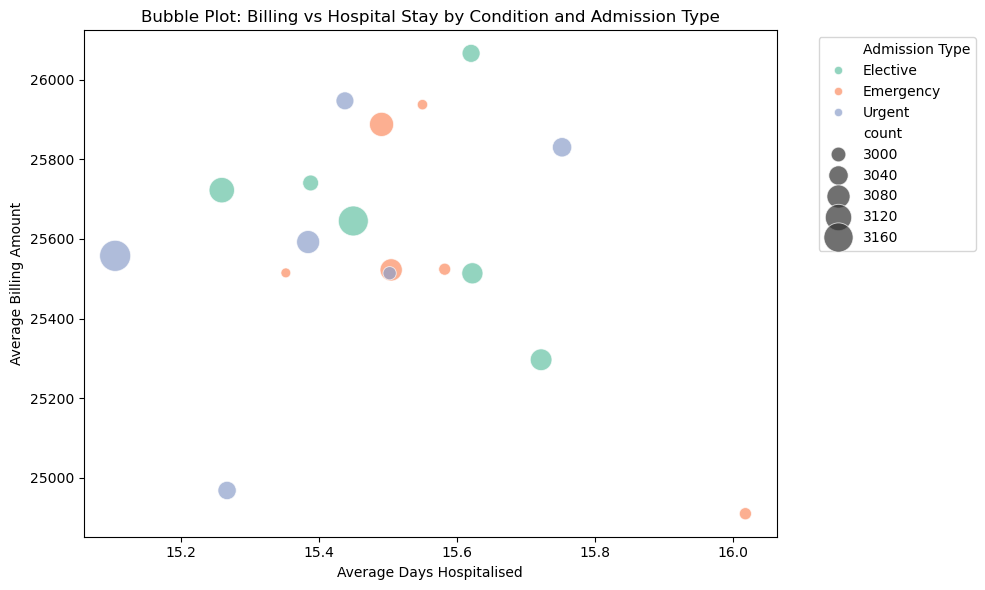

In [34]:
agg = healthcare_reduced.groupby(['Medical Condition','Admission Type']).agg(
    avg_days=('Days Hospitalized','mean'),
    avg_billing=('Billing Amount','mean'),
    count=('Billing Amount','size')
).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=agg,
    x='avg_days',
    y='avg_billing',
    size='count',        
    hue='Admission Type',
    alpha=0.7,
    sizes=(50, 500),
    palette='Set2'
)
plt.xlabel('Average Days Hospitalised')
plt.ylabel('Average Billing Amount')
plt.title('Bubble Plot: Billing vs Hospital Stay by Condition and Admission Type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()